# Refrigerator Price & Feature Analysis (Flipkart Dataset)

This project analyzes refrigerator products scraped from Flipkart to understand market pricing, brand trends, and product features. After cleaning messy text (prices, capacities, discounts, reviews) and converting them into usable numeric fields, I performed univariate, bivariate, and multivariate analysis. The goal is to identify how capacity, discount, and brand relate to price and ratings, and whether any strong relationships actually exist. Visualizations such as histograms, bar charts, boxplots, scatter plots, and a correlation heatmap reveal that larger capacity generally costs more, discounts are common on mid-range models, and price has almost no meaningful relationship with ratings.

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import requests
#!pip install BeatifulSoup4
#import BeatifulSoup
from bs4 import BeautifulSoup
import warnings


warnings.filterwarnings("ignore")

In [52]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [53]:
url="https://www.flipkart.com/search?q=fridges&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"

In [54]:
response=requests.get(url)

In [55]:
response

<Response [200]>

In [56]:
response.text

'<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/bundle.aa1465.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/bundle.fbaef9.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.png"/><link rel="apple

In [57]:
response.content

b'<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/bundle.aa1465.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/bundle.fbaef9.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.png"/><link rel="appl

In [58]:
pagecontent=response.text

In [59]:
soup=BeautifulSoup(pagecontent)

In [60]:
pname = soup.find("div",attrs={"class":"RG5Slk"})

In [61]:
pname

<div class="RG5Slk">Whirlpool 184 L Direct Cool Single Door 2 Star Refrigerator</div>

In [62]:
productname=[]
for x in soup.find_all("div",attrs={"class":"RG5Slk"}):
  productname.append(x.text if x else np.nan)


for name in productname:
  print(name)

Whirlpool 184 L Direct Cool Single Door 2 Star Refrigerator
Voltas Beko 183 L Direct Cool Single Door 4 Star Refrigerator
IFB 187 L Direct Cool Single Door 5 Star Refrigerator with Base Drawer  with Powered by E-Tech, Extrao...
Voltas Beko by A Tata Product 183 L Direct Cool Single Door 3 Star Refrigerator
IFB 197 L Direct Cool Single Door 5 Star Refrigerator  with Powered by E-Tech, Extraordinary Storage, ...
Haier 185 L Direct Cool Single Door 2 Star Refrigerator  with DEFT TechnologyLarge Vegetable Box
Voltas Beko by A Tata Product 183 L Direct Cool Single Door 3 Star Refrigerator
Whirlpool 184 L Direct Cool Single Door 2 Star Refrigerator
Samsung 183 L Direct Cool Single Door 5 Star Refrigerator with Base Drawer
Samsung 350 L Frost Free Double Door 3 Star Convertible Refrigerator  with 5-in-1, Digital Inverter, W...
Whirlpool 184 L Direct Cool Single Door 3 Star Refrigerator
Voltas Beko 283 L Frost Free Double Door 2 Star Refrigerator
Godrej 180 L Direct Cool Single Door 2 Star Ref

In [63]:
rating=soup.find("div",attrs={"class":"MKiFS6"})

In [64]:
rating

<div class="MKiFS6">4.3</div>

In [65]:
rating=[]
for x in soup.find_all("div",attrs={"class":"MKiFS6"}):
  rating.append(x.text if x else np.nan)


for name in rating:
  print(name)

4.3
4.4
4.4
4.3
4.4
4.3
4.3
4.3
4.5
4.2
4.3
4.2
4.3
4.4
4.3
4.3
4.3
4.4
4.4
4.1
4.2
4.3
4.3
4.2
4.4
5
5
4.4
3
5
4.4
5
4
4.5
5
4
4.2
4
4


In [66]:
price=soup.find("div",attrs={"class":"hZ3P6w DeU9vF"})

In [67]:
price

<div class="hZ3P6w DeU9vF">₹12,990</div>

In [68]:
price=[]
for x in soup.find_all("div",attrs={"class":"hZ3P6w DeU9vF"}):
  price.append(x.text if x else np.nan)


for name in price:
  print(name)

₹12,990
₹14,590
₹16,990
₹13,590
₹16,490
₹11,990
₹13,990
₹11,990
₹17,290
₹39,990
₹12,790
₹24,990
₹10,990
₹15,990
₹11,890
₹14,990
₹13,990
₹16,390
₹19,490
₹8,070
₹15,790
₹11,990
₹12,390
₹23,990


In [69]:
discount = soup.find("div",attrs={"class":"HQe8jr"})

In [70]:
discount

<div class="HQe8jr"><span>25% off</span></div>

In [71]:
discount=[]
for x in soup.find_all("div",attrs={"class":"HQe8jr"}):
  discount.append(x.text if x else np.nan)


for name in discount:
  print(name)

25% off
46% off
29% off
46% off
18% off
29% off
44% off
22% off
21% off
33% off
21% off
37% off
35% off
43% off
52% off
26% off
24% off
23% off
37% off
32% off
25% off
24% off
52% off
25% off
37% off
46% off
29% off
21% off
25% off


In [72]:
reviews=soup.find("span",attrs={"class":"o2SIOJ"})

In [73]:
reviews

<span class="o2SIOJ">&amp;</span>

In [74]:
original_price=soup.find("div",attrs={"class":"kRYCnD gxR4EY"})

In [75]:
original_price

<div class="kRYCnD gxR4EY">₹<!-- -->17,500</div>

In [76]:
original_price=[]
for x in soup.find_all("div",attrs={"class":"kRYCnD gxR4EY"}):
  original_price.append(x.text if x else np.nan)


for name in original_price:
  print(name)

₹17,500
₹27,190
₹23,990
₹25,190
₹20,350
₹17,090
₹25,190
₹15,400
₹21,999
₹59,990
₹16,200
₹39,990
₹16,990
₹28,490
₹25,190
₹20,500
₹18,550
₹21,450
₹30,999
₹11,993
₹21,200
₹15,800
₹25,990
₹32,150


In [77]:
features=soup.find("li",attrs={"class":"DTBslk"})

In [78]:
features

<li class="DTBslk">Normal Compressor</li>

In [79]:
features=[]
for x in soup.find_all("li",attrs={"class":"DTBslk"}):
  features.append(x.text if x else np.nan)


for name in features:
  print(name)

Normal Compressor
Built-in Stabilizer
1 Year Comprehensive Warranty on Product and 9 Years Warranty on Compressor
Reciprocating Compressor
Built-in Stabilizer
1 Year Comprehensive Warranty on Product and 10 Years Compressor Warranty
Reciprocating Compressor
Built-in Stabilizer
IFB Super Warranty: India's First & Only! Enjoy 4 years of machine warranty, 10 years of compressor warranty, and 10 years of spare parts support.
Reciprocating Compressor
Built-in Stabilizer
1 Year Comprehensive warranty on product & 10 Years warranty on compressor
Reciprocating Compressor
Built-in Stabilizer
IFB Super Warranty: India's First & Only! Enjoy 4 years of machine warranty, 10 years of compressor warranty, and 10 years of spare parts support.
Normal Compressor
Built-in Stabilizer
1 Year Warranty on Product and 10 Years Warranty on Compressor
Reciprocating Compressor
Built-in Stabilizer
1 Year Comprehensive Warranty on Product and 10 Years Warranty on Compressor
Normal Compressor
Built-in Stabilizer
1 

In [80]:
reviews=soup.find("span",attrs={"class":"PvbNMB"})

In [81]:
reviews

<span class="PvbNMB"><span><span>26,141 Ratings </span><span class="o2SIOJ">&amp;</span><span> 1,519 Reviews</span></span></span>

In [82]:
reviews=[]
for x in soup.find_all("span",attrs={"class":"PvbNMB"}):
  reviews.append(x.text if x else np.nan)


for name in reviews:
  print(name)

26,141 Ratings & 1,519 Reviews
5,129 Ratings & 385 Reviews
4,568 Ratings & 336 Reviews
11,398 Ratings & 700 Reviews
4,568 Ratings & 336 Reviews
16,177 Ratings & 1,009 Reviews
11,398 Ratings & 700 Reviews
20,255 Ratings & 1,030 Reviews
1,05,931 Ratings & 6,404 Reviews
15,330 Ratings & 1,020 Reviews
20,255 Ratings & 1,030 Reviews
1,848 Ratings & 128 Reviews
15,897 Ratings & 814 Reviews
5,129 Ratings & 385 Reviews
11,398 Ratings & 700 Reviews
604 Ratings & 31 Reviews
26,141 Ratings & 1,519 Reviews
25,063 Ratings & 1,624 Reviews
21,536 Ratings & 1,607 Reviews
375 Ratings & 29 Reviews
4,921 Ratings & 296 Reviews
20,255 Ratings & 1,030 Reviews
11,398 Ratings & 700 Reviews
35,135 Ratings & 3,241 Reviews


In [83]:
for i in range(1,83):
    url=f"https://www.flipkart.com/search?q=fridges&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off={i}"
    print(url)

https://www.flipkart.com/search?q=fridges&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off=1
https://www.flipkart.com/search?q=fridges&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off=2
https://www.flipkart.com/search?q=fridges&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off=3
https://www.flipkart.com/search?q=fridges&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off=4
https://www.flipkart.com/search?q=fridges&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off=5
https://www.flipkart.com/search?q=fridges&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off=6
https://www.flipkart.com/search?q=fridges&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off=7
https://www.flipkart.com/search?q=fridges&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off=8
https://www.flipkart.com/search?q=fridges&otracker=search&otracker1=sear

In [87]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import time

productname = [] 
price = []
rating = []
features = []
pagenum = []
original_price = []
Discount = []
Review = []

total_time = time.time()

for i in range(1, 83): 
    start_time = time.time()
    URL = f"https://www.flipkart.com/search?q=fridges&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off={i}"
    page = requests.get(URL)
    soup = BeautifulSoup(page.text, "html.parser")

    for x in soup.find_all('div', attrs={'class':'ZFwe0M row'}):
        pname = x.find('div', attrs={'class':'RG5Slk'})
        cost = x.find('div', attrs={'class':'hZ3P6w DeU9vF'})   # discounted price
        rat = x.find('div', attrs={'class':'MKiFS6'})
        specs = x.find('div', attrs={'class':'DTBslk'})
        op = x.find('div', attrs={'class':'kRYCnD gxR4EY'})
        discount = x.find('div', attrs={'class':'HQe8jr'})
        reviews = x.find('span', attrs={'class':'PvbNMB'})
        

        productname.append(pname.text if pname else np.nan)
        price.append(cost.text if cost else np.nan)
        rating.append(rat.text if rat else np.nan)
        features.append(specs.text if specs else np.nan)
        original_price.append(op.text if op else np.nan)
        Discount.append(discount.text if discount else np.nan)
        Review.append(reviews.text if reviews else np.nan)
        
        pagenum.append(i)

    print(f'Page {i} completed in {time.time()-start_time:.2f} seconds')

print("Total Time Completed in seconds", str(time.time()-total_time))


Page 1 completed in 0.50 seconds
Page 2 completed in 0.48 seconds
Page 3 completed in 0.71 seconds
Page 4 completed in 0.48 seconds
Page 5 completed in 0.50 seconds
Page 6 completed in 0.51 seconds
Page 7 completed in 0.50 seconds
Page 8 completed in 0.49 seconds
Page 9 completed in 0.51 seconds
Page 10 completed in 0.51 seconds
Page 11 completed in 0.53 seconds
Page 12 completed in 0.48 seconds
Page 13 completed in 0.70 seconds
Page 14 completed in 0.54 seconds
Page 15 completed in 0.52 seconds
Page 16 completed in 0.49 seconds
Page 17 completed in 0.50 seconds
Page 18 completed in 0.53 seconds
Page 19 completed in 0.60 seconds
Page 20 completed in 0.61 seconds
Page 21 completed in 0.51 seconds
Page 22 completed in 0.49 seconds
Page 23 completed in 0.46 seconds
Page 24 completed in 0.58 seconds
Page 25 completed in 0.54 seconds
Page 26 completed in 0.51 seconds
Page 27 completed in 0.60 seconds
Page 28 completed in 0.51 seconds
Page 29 completed in 0.47 seconds
Page 30 completed in 0.

In [90]:
Refridgerator_df=pd.DataFrame({"product_name":productname,"price":price,"rating":rating,"pagenum":pagenum,
                              "original_price":original_price,"Discount":Discount,"Review":Review})


In [91]:
Refridgerator_df

,product_name,price,rating,pagenum,original_price,Discount,Review
0,Voltas Beko 183 L Direct Cool Single Door 4 St...,"₹14,590",4.4,1,"₹27,190",46% off,"5,129 Ratings & 385 Reviews"
1,IFB 187 L Direct Cool Single Door 5 Star Refri...,"₹16,990",4.4,1,"₹23,990",29% off,"4,568 Ratings & 336 Reviews"
2,Voltas Beko by A Tata Product 183 L Direct Coo...,"₹13,590",4.3,1,"₹25,190",46% off,"11,398 Ratings & 700 Reviews"
3,IFB 197 L Direct Cool Single Door 5 Star Refri...,"₹16,490",4.4,1,"₹20,350",18% off,"4,568 Ratings & 336 Reviews"
4,Haier 185 L Direct Cool Single Door 2 Star Ref...,"₹11,990",4.3,1,"₹17,090",29% off,"16,177 Ratings & 1,009 Reviews"
...,...,...,...,...,...,...,...
1963,Samsung 183 L Direct Cool Single Door 4 Star R...,"₹15,990",4.5,82,"₹22,999",30% off,"1,05,931 Ratings & 6,404 Reviews"
1964,Haier 165 L Direct Cool Single Door 1 Star Ref...,"₹10,990",4.2,82,"₹14,990",26% off,"6,201 Ratings & 386 Reviews"
1965,Samsung 322 L Frost Free Double Door 3 Star Co...,"₹37,990",4.2,82,"₹60,990",37% off,"15,330 Ratings & 1,020 Reviews"
1966,Samsung 330 L Frost Free Double Door 3 Star Co...,"₹37,990",4.2,82,"₹56,990",33% off,"15,330 Ratings & 1,020 Reviews"


In [92]:
Refridgerator_df.to_csv("Refridgerators.csv",index=False)

In [93]:
df=pd.read_csv("Refridgerators.csv")

In [94]:
df

,product_name,price,rating,pagenum,original_price,Discount,Review
0,Voltas Beko 183 L Direct Cool Single Door 4 St...,"₹14,590",4.4,1,"₹27,190",46% off,"5,129 Ratings & 385 Reviews"
1,IFB 187 L Direct Cool Single Door 5 Star Refri...,"₹16,990",4.4,1,"₹23,990",29% off,"4,568 Ratings & 336 Reviews"
2,Voltas Beko by A Tata Product 183 L Direct Coo...,"₹13,590",4.3,1,"₹25,190",46% off,"11,398 Ratings & 700 Reviews"
3,IFB 197 L Direct Cool Single Door 5 Star Refri...,"₹16,490",4.4,1,"₹20,350",18% off,"4,568 Ratings & 336 Reviews"
4,Haier 185 L Direct Cool Single Door 2 Star Ref...,"₹11,990",4.3,1,"₹17,090",29% off,"16,177 Ratings & 1,009 Reviews"
...,...,...,...,...,...,...,...
1963,Samsung 183 L Direct Cool Single Door 4 Star R...,"₹15,990",4.5,82,"₹22,999",30% off,"1,05,931 Ratings & 6,404 Reviews"
1964,Haier 165 L Direct Cool Single Door 1 Star Ref...,"₹10,990",4.2,82,"₹14,990",26% off,"6,201 Ratings & 386 Reviews"
1965,Samsung 322 L Frost Free Double Door 3 Star Co...,"₹37,990",4.2,82,"₹60,990",37% off,"15,330 Ratings & 1,020 Reviews"
1966,Samsung 330 L Frost Free Double Door 3 Star Co...,"₹37,990",4.2,82,"₹56,990",33% off,"15,330 Ratings & 1,020 Reviews"


In [95]:
df.shape

(1968, 7)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_name    1968 non-null   object 
 1   price           1968 non-null   object 
 2   rating          1968 non-null   float64
 3   pagenum         1968 non-null   int64  
 4   original_price  1968 non-null   object 
 5   Discount        1968 non-null   object 
 6   Review          1968 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 107.8+ KB


# Checking Null Values

In [97]:
df.isnull().sum()

product_name      0
price             0
rating            0
pagenum           0
original_price    0
Discount          0
Review            0
dtype: int64

In [98]:
df.head()

,product_name,price,rating,pagenum,original_price,Discount,Review
0,Voltas Beko 183 L Direct Cool Single Door 4 St...,"₹14,590",4.4,1,"₹27,190",46% off,"5,129 Ratings & 385 Reviews"
1,IFB 187 L Direct Cool Single Door 5 Star Refri...,"₹16,990",4.4,1,"₹23,990",29% off,"4,568 Ratings & 336 Reviews"
2,Voltas Beko by A Tata Product 183 L Direct Coo...,"₹13,590",4.3,1,"₹25,190",46% off,"11,398 Ratings & 700 Reviews"
3,IFB 197 L Direct Cool Single Door 5 Star Refri...,"₹16,490",4.4,1,"₹20,350",18% off,"4,568 Ratings & 336 Reviews"
4,Haier 185 L Direct Cool Single Door 2 Star Ref...,"₹11,990",4.3,1,"₹17,090",29% off,"16,177 Ratings & 1,009 Reviews"


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_name    1968 non-null   object 
 1   price           1968 non-null   object 
 2   rating          1968 non-null   float64
 3   pagenum         1968 non-null   int64  
 4   original_price  1968 non-null   object 
 5   Discount        1968 non-null   object 
 6   Review          1968 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 107.8+ KB


In [100]:
print(df.isnull().sum())

product_name      0
price             0
rating            0
pagenum           0
original_price    0
Discount          0
Review            0
dtype: int64


In [101]:
# df.drop(columns=['features'], inplace=True)

In [102]:
# Remove non-numeric characters and convert to float
df['Discount'] = df['Discount'].str.extract('(\d+)').astype(float)

df['Review'] = df['Review'].str.replace(',', '').str.extract('(\d+)').astype(float)

In [103]:
df.isnull().sum()

product_name      0
price             0
rating            0
pagenum           0
original_price    0
Discount          0
Review            0
dtype: int64

In [104]:
df["original_price"].value_counts()

original_price
₹25,190    246
₹23,990    124
₹21,999    124
₹27,190     88
₹22,999     84
₹20,350     82
₹59,990     82
₹16,990     82
₹20,500     82
₹30,999     82
₹11,993     82
₹25,990     82
₹32,150     82
₹17,090     82
₹24,000     42
₹34,990     42
₹14,990     42
₹60,990     42
₹56,990     42
₹17,500     40
₹28,490     40
₹39,990     40
₹18,550     39
₹16,200     39
₹15,800     39
₹15,400     37
₹21,450     34
₹21,200     34
₹40,990      6
₹36,490      6
Name: count, dtype: int64

In [105]:
df["original_price"].fillna(df["original_price"].mode()[0],inplace = True)

In [106]:
df["Discount"].value_counts()

Discount
25.0    198
29.0    164
37.0    164
52.0    164
46.0    164
26.0    124
33.0    124
18.0    124
21.0    121
24.0    120
44.0     88
35.0     82
32.0     82
45.0     42
30.0     42
34.0     42
43.0     40
22.0     37
23.0     34
36.0      6
38.0      6
Name: count, dtype: int64

In [107]:
df["Discount"].fillna(df["Discount"].mode()[0],inplace = True)

In [108]:
df.isnull().sum()

product_name      0
price             0
rating            0
pagenum           0
original_price    0
Discount          0
Review            0
dtype: int64

In [109]:
df.head()

,product_name,price,rating,pagenum,original_price,Discount,Review
0,Voltas Beko 183 L Direct Cool Single Door 4 St...,"₹14,590",4.4,1,"₹27,190",46.0,5129.0
1,IFB 187 L Direct Cool Single Door 5 Star Refri...,"₹16,990",4.4,1,"₹23,990",29.0,4568.0
2,Voltas Beko by A Tata Product 183 L Direct Coo...,"₹13,590",4.3,1,"₹25,190",46.0,11398.0
3,IFB 197 L Direct Cool Single Door 5 Star Refri...,"₹16,490",4.4,1,"₹20,350",18.0,4568.0
4,Haier 185 L Direct Cool Single Door 2 Star Ref...,"₹11,990",4.3,1,"₹17,090",29.0,16177.0


In [110]:
null=df[df['price'].isnull()].index

In [111]:
df[df['price'].isnull()].index

Index([], dtype='int64')

In [112]:
df['price'].fillna(14000, inplace=True)

In [113]:
df.isnull().sum()

product_name      0
price             0
rating            0
pagenum           0
original_price    0
Discount          0
Review            0
dtype: int64

# Check Duplicates

In [114]:
df.duplicated().sum()

np.int64(0)

In [115]:
df.drop_duplicates(inplace=True)

In [116]:
df.duplicated().sum()

np.int64(0)

In [117]:
df['product_name']

0       Voltas Beko 183 L Direct Cool Single Door 4 St...
1       IFB 187 L Direct Cool Single Door 5 Star Refri...
2       Voltas Beko by A Tata Product 183 L Direct Coo...
3       IFB 197 L Direct Cool Single Door 5 Star Refri...
4       Haier 185 L Direct Cool Single Door 2 Star Ref...
                              ...                        
1963    Samsung 183 L Direct Cool Single Door 4 Star R...
1964    Haier 165 L Direct Cool Single Door 1 Star Ref...
1965    Samsung 322 L Frost Free Double Door 3 Star Co...
1966    Samsung 330 L Frost Free Double Door 3 Star Co...
1967    Godrej 185 L Direct Cool Single Door 5 Star Re...
Name: product_name, Length: 1968, dtype: object

# Apply Regular Expressions

In [118]:
df["Brand"]=df["product_name"].apply(lambda x:re.findall(r"^\w+",x)[0])

In [119]:
df["product_name"].apply(lambda x:re.findall(r"^\w+",x)[0])

0        Voltas
1           IFB
2        Voltas
3           IFB
4         Haier
         ...   
1963    Samsung
1964      Haier
1965    Samsung
1966    Samsung
1967     Godrej
Name: product_name, Length: 1968, dtype: object

In [120]:
df["Brand"]

0        Voltas
1           IFB
2        Voltas
3           IFB
4         Haier
         ...   
1963    Samsung
1964      Haier
1965    Samsung
1966    Samsung
1967     Godrej
Name: Brand, Length: 1968, dtype: object

In [121]:
df["Brand"].value_counts().head()

Brand
Voltas       508
Samsung      456
Whirlpool    426
Godrej       166
IFB          164
Name: count, dtype: int64

In [122]:
df['capacity_liters'] = df['product_name'].apply(lambda x: re.findall(r"\b\d+\s*L\b", x)[0] if re.findall(r"\b\d+\s*L\b", x) else None)

In [123]:
 df['product_name'].apply(lambda x: re.findall(r"\b\d+\s*L\b", x)[0] if re.findall(r"\b\d+\s*L\b", x) else None)

0       183 L
1       187 L
2       183 L
3       197 L
4       185 L
        ...  
1963    183 L
1964    165 L
1965    322 L
1966    330 L
1967    185 L
Name: product_name, Length: 1968, dtype: object

In [124]:
df["product_name"].apply(lambda x:re.findall(r"\d+",x)[0])

0       183
1       187
2       183
3       197
4       185
       ... 
1963    183
1964    165
1965    322
1966    330
1967    185
Name: product_name, Length: 1968, dtype: object

In [125]:
df['capacity_in_liters']=df["product_name"].apply(lambda x:re.findall(r"\d+",x)[0])

In [126]:
df

,product_name,price,rating,pagenum,original_price,Discount,Review,Brand,capacity_liters,capacity_in_liters
0,Voltas Beko 183 L Direct Cool Single Door 4 St...,"₹14,590",4.4,1,"₹27,190",46.0,5129.0,Voltas,183 L,183
1,IFB 187 L Direct Cool Single Door 5 Star Refri...,"₹16,990",4.4,1,"₹23,990",29.0,4568.0,IFB,187 L,187
2,Voltas Beko by A Tata Product 183 L Direct Coo...,"₹13,590",4.3,1,"₹25,190",46.0,11398.0,Voltas,183 L,183
3,IFB 197 L Direct Cool Single Door 5 Star Refri...,"₹16,490",4.4,1,"₹20,350",18.0,4568.0,IFB,197 L,197
4,Haier 185 L Direct Cool Single Door 2 Star Ref...,"₹11,990",4.3,1,"₹17,090",29.0,16177.0,Haier,185 L,185
...,...,...,...,...,...,...,...,...,...,...
1963,Samsung 183 L Direct Cool Single Door 4 Star R...,"₹15,990",4.5,82,"₹22,999",30.0,105931.0,Samsung,183 L,183
1964,Haier 165 L Direct Cool Single Door 1 Star Ref...,"₹10,990",4.2,82,"₹14,990",26.0,6201.0,Haier,165 L,165
1965,Samsung 322 L Frost Free Double Door 3 Star Co...,"₹37,990",4.2,82,"₹60,990",37.0,15330.0,Samsung,322 L,322
1966,Samsung 330 L Frost Free Double Door 3 Star Co...,"₹37,990",4.2,82,"₹56,990",33.0,15330.0,Samsung,330 L,330


In [127]:
df["price"] = df["price"].astype(str).apply(lambda x: x[1:] if x.startswith("₹") else x)


In [128]:
df["price"] 

0       14,590
1       16,990
2       13,590
3       16,490
4       11,990
         ...  
1963    15,990
1964    10,990
1965    37,990
1966    37,990
1967    15,790
Name: price, Length: 1968, dtype: object

In [129]:
df["price"]=df["price"].apply(lambda x:re.sub(r",","",x))

In [130]:
df["price"]

0       14590
1       16990
2       13590
3       16490
4       11990
        ...  
1963    15990
1964    10990
1965    37990
1966    37990
1967    15790
Name: price, Length: 1968, dtype: object

In [131]:
df["price"]=df["price"].astype("int")

In [132]:
df["original_price"]

0       ₹27,190
1       ₹23,990
2       ₹25,190
3       ₹20,350
4       ₹17,090
         ...   
1963    ₹22,999
1964    ₹14,990
1965    ₹60,990
1966    ₹56,990
1967    ₹23,990
Name: original_price, Length: 1968, dtype: object

In [133]:
df["original_price"].apply(lambda x:x[1:])

0       27,190
1       23,990
2       25,190
3       20,350
4       17,090
         ...  
1963    22,999
1964    14,990
1965    60,990
1966    56,990
1967    23,990
Name: original_price, Length: 1968, dtype: object

In [134]:
df["original_price"]=df["original_price"].apply(lambda x:x[1:])

In [135]:
df["original_price"]=df["original_price"].apply(lambda x:re.sub(r",","",x))

In [136]:
df["original_price"]=df["original_price"].astype("int")

In [137]:
df.dtypes

product_name           object
price                   int64
rating                float64
pagenum                 int64
original_price          int64
Discount              float64
Review                float64
Brand                  object
capacity_liters        object
capacity_in_liters     object
dtype: object

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_name        1968 non-null   object 
 1   price               1968 non-null   int64  
 2   rating              1968 non-null   float64
 3   pagenum             1968 non-null   int64  
 4   original_price      1968 non-null   int64  
 5   Discount            1968 non-null   float64
 6   Review              1968 non-null   float64
 7   Brand               1968 non-null   object 
 8   capacity_liters     1968 non-null   object 
 9   capacity_in_liters  1968 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 153.9+ KB


In [139]:
df.shape

(1968, 10)

In [140]:
df

,product_name,price,rating,pagenum,original_price,Discount,Review,Brand,capacity_liters,capacity_in_liters
0,Voltas Beko 183 L Direct Cool Single Door 4 St...,14590,4.4,1,27190,46.0,5129.0,Voltas,183 L,183
1,IFB 187 L Direct Cool Single Door 5 Star Refri...,16990,4.4,1,23990,29.0,4568.0,IFB,187 L,187
2,Voltas Beko by A Tata Product 183 L Direct Coo...,13590,4.3,1,25190,46.0,11398.0,Voltas,183 L,183
3,IFB 197 L Direct Cool Single Door 5 Star Refri...,16490,4.4,1,20350,18.0,4568.0,IFB,197 L,197
4,Haier 185 L Direct Cool Single Door 2 Star Ref...,11990,4.3,1,17090,29.0,16177.0,Haier,185 L,185
...,...,...,...,...,...,...,...,...,...,...
1963,Samsung 183 L Direct Cool Single Door 4 Star R...,15990,4.5,82,22999,30.0,105931.0,Samsung,183 L,183
1964,Haier 165 L Direct Cool Single Door 1 Star Ref...,10990,4.2,82,14990,26.0,6201.0,Haier,165 L,165
1965,Samsung 322 L Frost Free Double Door 3 Star Co...,37990,4.2,82,60990,37.0,15330.0,Samsung,322 L,322
1966,Samsung 330 L Frost Free Double Door 3 Star Co...,37990,4.2,82,56990,33.0,15330.0,Samsung,330 L,330


In [141]:
df.to_csv("cleaned_refriderator.csv",index = False)


In [142]:
df = pd.read_csv("cleaned_refriderator.csv")

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_name        1968 non-null   object 
 1   price               1968 non-null   int64  
 2   rating              1968 non-null   float64
 3   pagenum             1968 non-null   int64  
 4   original_price      1968 non-null   int64  
 5   Discount            1968 non-null   float64
 6   Review              1968 non-null   float64
 7   Brand               1968 non-null   object 
 8   capacity_liters     1968 non-null   object 
 9   capacity_in_liters  1968 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 153.9+ KB


In [144]:
df.shape

(1968, 10)

In [145]:
df.duplicated().sum()

np.int64(0)

# Groupby Analysis

In [146]:
brand_price = df.groupby("Brand")["price"].mean().sort_values(ascending=False)
print(brand_price)

Brand
Samsung      25525.526316
realme       18990.000000
IFB          16740.000000
Whirlpool    15882.018779
Voltas       14701.417323
Godrej       13975.542169
Haier        11651.290323
Blue          8070.000000
Name: price, dtype: float64


In [147]:
brand_rating = df.groupby("Brand")["rating"].mean().sort_values(ascending=False)
print(brand_rating)


Brand
IFB          4.400000
Samsung      4.372807
Voltas       4.314961
Godrej       4.300000
realme       4.300000
Whirlpool    4.280751
Haier        4.266129
Blue         4.100000
Name: rating, dtype: float64


In [148]:
brand_discount = df.groupby("Brand")["Discount"].mean().sort_values(ascending=False)
print(brand_discount)


Brand
Voltas       46.433071
realme       45.000000
Godrej       32.216867
Blue         32.000000
Samsung      29.442982
Haier        27.983871
Whirlpool    24.223005
IFB          23.500000
Name: Discount, dtype: float64


# Correlation

In [150]:
corr_rating_reviews = df[['rating', 'Review']].corr()
print(corr_rating_reviews)

          rating    Review
rating  1.000000  0.556558
Review  0.556558  1.000000


## Refrigarator under 20000 t0 60000

In [166]:
df_20k_50k = df[(df["price"] >= 20000) & (df["price"] <= 60000)]
df_20k_50k.head()

,product_name,price,rating,pagenum,original_price,Discount,Review,Brand,capacity_liters,capacity_in_liters
7,Samsung 350 L Frost Free Double Door 3 Star Co...,39990,4.2,1,59990,33.0,15330.0,Samsung,350 L,350
14,Whirlpool 215 L Frost Free Triple Door Refrige...,23990,4.2,1,32150,25.0,35135.0,Whirlpool,215 L,215
21,Samsung 322 L Frost Free Double Door 3 Star Co...,37990,4.2,1,60990,37.0,15330.0,Samsung,322 L,322
22,Samsung 330 L Frost Free Double Door 3 Star Co...,37990,4.2,1,56990,33.0,15330.0,Samsung,330 L,330
31,Samsung 350 L Frost Free Double Door 3 Star Co...,39990,4.2,2,59990,33.0,15330.0,Samsung,350 L,350


## visualizations
## Univariate Analysis

In [153]:
import matplotlib.pyplot as plt

In [154]:
import seaborn as sns

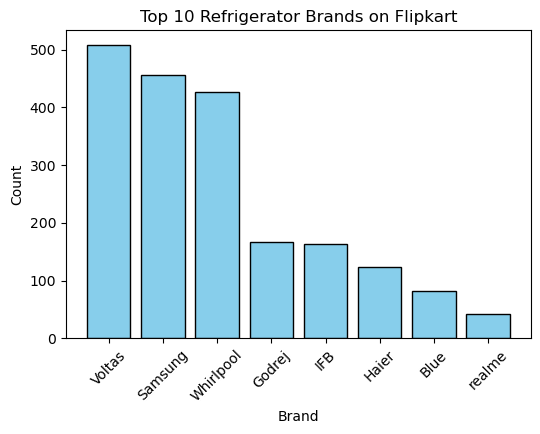

In [155]:
# Bar Chart for Brand (Categorical)

df.columns = df.columns.str.strip()

counts = df["Brand"].value_counts().head(10)
plt.figure(figsize=(6, 4))
plt.bar(counts.index, counts.values, color='skyblue', edgecolor='black')
plt.title("Top 10 Refrigerator Brands on Flipkart")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show(); 


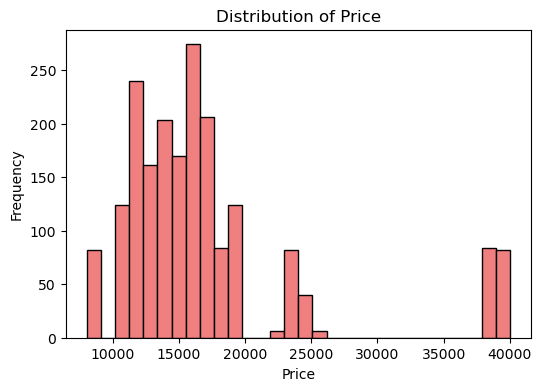

In [158]:
# Histogram for Price (Numerical)

plt.figure(figsize=(6, 4))
plt.hist(df['price'], bins=30, color='lightcoral', edgecolor='black')
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show();

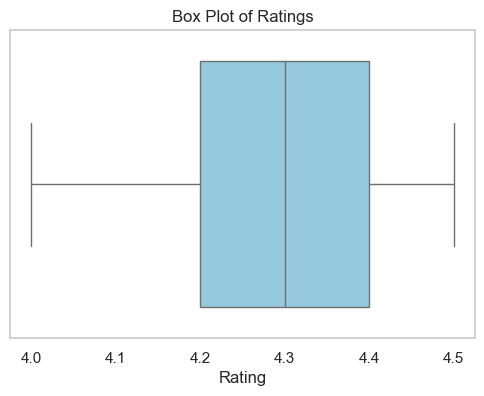

In [368]:
# Box Plot for Ratings(Numerical) 

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['rating'], color='skyblue')

plt.title("Box Plot of Ratings")
plt.xlabel("Rating")
plt.grid(False)
plt.show(); 

# Bivariate Analysis

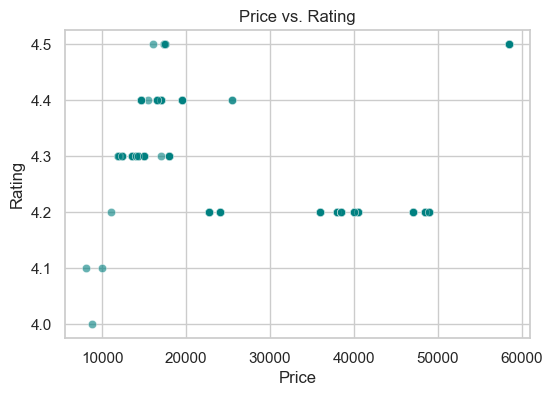

In [369]:
# Numerical vs. Numerical: Scatter Plot

df.columns = df.columns.str.strip()

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='price', y='rating', color='teal', alpha=0.6)

plt.title("Price vs. Rating")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.show();   

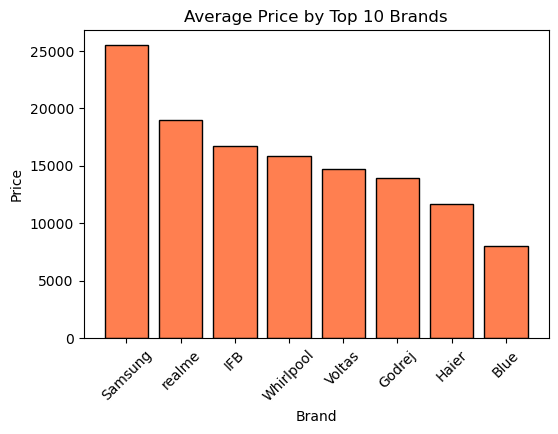

In [159]:
# Categorical vs. Numerical: Bar Plot
df.columns = df.columns.str.strip()

plt.figure(figsize=(6, 4))
avg_price_brand = df.groupby('Brand')['price'].mean().sort_values(ascending=False).head(10)
plt.bar(avg_price_brand.index, avg_price_brand.values, color='coral', edgecolor='black')
plt.title("Average Price by Top 10 Brands")
plt.xlabel("Brand")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show();

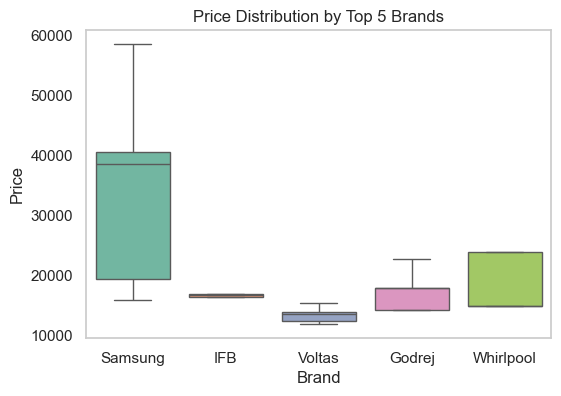

In [371]:
# Categorical vs. Numerical: Box Plot

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))

top_5_brands = df['Brand'].value_counts().nlargest(5).index
df_subset = df[df['Brand'].isin(top_5_brands)]

sns.boxplot(data=df_subset, x='Brand', y='price', palette='Set2')

plt.title("Price Distribution by Top 5 Brands")
plt.xlabel("Brand")
plt.ylabel("Price")
plt.grid(False)

plt.show();


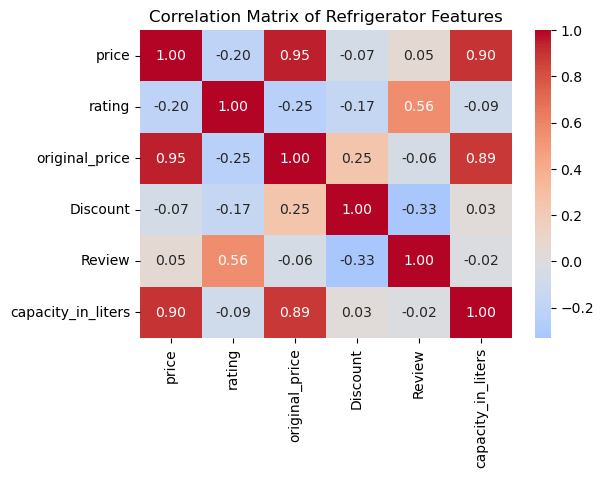

In [160]:
# Numerical vs. Numerical : Heat map

df.columns = df.columns.str.strip()
numeric_cols = ['price','rating','original_price','Discount','Review','capacity_in_liters']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',center=0,fmt=".2f")
plt.title('Correlation Matrix of Refrigerator Features')
plt.show();



# Multivariate Analysis

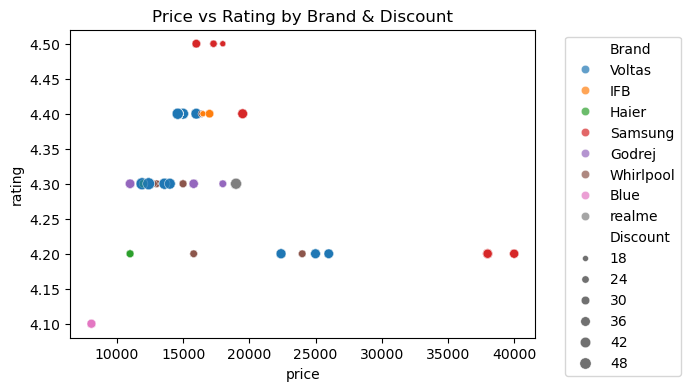

In [163]:
# Multivariate Scatter Plot
df.columns = df.columns.str.strip()

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='price', y='rating', hue='Brand', size='Discount', alpha=0.7)
plt.title("Price vs Rating by Brand & Discount")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show();